In [1]:
import math
import matplotlib.pyplot as plt 
from sklearn.datasets import load_digits
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import pylab
import sys
import keras
from sklearn.naive_bayes import BernoulliNB, MultinomialNB

Using TensorFlow backend.


In [2]:
sys.path.append("../code/")

import utils
import LR2NBK_GP

In [3]:
%load_ext autoreload
%autoreload 2

# Loading and Binarizing Features

In [4]:
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

X_train = np.copy(X_train)
X_test  = np.copy(X_test)

In [5]:
train_mean = np.mean(X_train, axis=0)
train_std  = np.std(X_train, axis=0)

trainZ = X_train <= train_mean + 0.05 * train_std

test_mean = np.mean(X_test, axis=0)
test_std  = np.std(X_test, axis=0)

testZ = X_test <= test_mean + 0.05 * test_std

nZ  = np.logical_not(trainZ)
tnZ = np.logical_not(testZ)

X_train[trainZ] = 0
X_train[nZ] = 1
X_test[testZ] = 0
X_test[tnZ] = 1

X_train = X_train.reshape(-1, 28*28)
X_test  = X_test.reshape(-1, 28*28)

In [6]:
%%time
from sklearn.naive_bayes import BernoulliNB
NB = BernoulliNB().fit(X_train, y_train)
print(np.average(NB.predict(X_test) == y_test))

0.6936
CPU times: user 700 ms, sys: 449 ms, total: 1.15 s
Wall time: 573 ms


### Loading Pretrained Logistic Regression and Conforming NaCL model

In [7]:
import pickle

clf, aData = utils.load("../pretrained/fashion_mnist_meanbinarizedi_785_.pickle")

W = np.hstack((clf.intercept_[:,None], clf.coef_))
nacl = LR2NBK_GP.LR2NBK(W)
nacl.load(aData)

In [8]:
%%time
np.average(np.mean(nacl.classify(X_test) == y_test)), np.average(clf.predict(X_test) == y_test)

CPU times: user 590 ms, sys: 557 ms, total: 1.15 s
Wall time: 248 ms


(0.8208, 0.8208)

# Missing Data

In [9]:
%%time
setting = {
    "repeat": 1, #10
    "k": [i for i in range(0, 800, 20)],
    "prob" : True,
    "function": utils.conditional_likelihood_k
}
data_a2 = utils.run_experiment_k_paper(X_test, y_test, clf, NB, nacl, setting)

Using following function: 
<function conditional_likelihood_k at 0x7f7440b4d668>
Possible features to remove: 784
K = 0
	 R = 0


../code/utils.py:81: RuntimeWarning: invalid value encountered in divide
  Z2 = Z1 / np.sum(Z1, axis = 1)


K = 20
	 R = 0
K = 40
	 R = 0
K = 60
	 R = 0
K = 80
	 R = 0
K = 100
	 R = 0
K = 120
	 R = 0
K = 140
	 R = 0
K = 160
	 R = 0
K = 180
	 R = 0
K = 200
	 R = 0
K = 220
	 R = 0
K = 240
	 R = 0
K = 260
	 R = 0
K = 280
	 R = 0
K = 300
	 R = 0
K = 320
	 R = 0
K = 340
	 R = 0
K = 360
	 R = 0
K = 380
	 R = 0
K = 400
	 R = 0
K = 420
	 R = 0
K = 440
	 R = 0
K = 460
	 R = 0
K = 480
	 R = 0
K = 500
	 R = 0
K = 520
	 R = 0
K = 540
	 R = 0
K = 560
	 R = 0
K = 580
	 R = 0
K = 600
	 R = 0
K = 620
	 R = 0
K = 640
	 R = 0
K = 660
	 R = 0
K = 680
	 R = 0
K = 700
	 R = 0
K = 720
	 R = 0
K = 740
	 R = 0
K = 760
	 R = 0
K = 780
	 R = 0
CPU times: user 1min 55s, sys: 1min 20s, total: 3min 16s
Wall time: 1min 17s


<module 'matplotlib.pyplot' from '/home/pasha/Desktop/ucla-lab/missing/gpkit2/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>

/home/pasha/Desktop/ucla-lab/missing/gpkit2/lib/python2.7/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


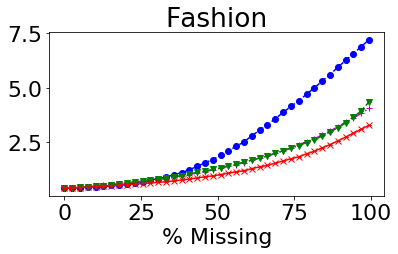

In [10]:
setting = {
    "show": ["mean", "median", "ours","min"],
    "saveAs": "../results/fashion_mnistk_cross.pdf",
    "title": "Fashion",
    "Ylabel": "",#"Cross Entropy",
    "Xlabel": "% Missing",
    "legend": False,
    "size": (6,4)
}
utils.plot_results_paper(data_a2, setting)

In [11]:
%%time
accuracy = lambda x,y: np.mean(x == y)
setting = {
    "repeat": 1, #10
    "k": [i for i in range(0, 800, 20)],
    "prob" : False,
    "function": accuracy
}
data_a3 = utils.run_experiment_k_paper(X_test, y_test, clf, NB, nacl, setting)

Using following function: 
<function <lambda> at 0x7f7440ba1848>
Possible features to remove: 784
K = 0
	 R = 0
K = 20
	 R = 0
K = 40
	 R = 0
K = 60
	 R = 0
K = 80
	 R = 0
K = 100
	 R = 0
K = 120
	 R = 0
K = 140
	 R = 0
K = 160
	 R = 0
K = 180
	 R = 0
K = 200
	 R = 0
K = 220
	 R = 0
K = 240
	 R = 0
K = 260
	 R = 0
K = 280
	 R = 0
K = 300
	 R = 0
K = 320
	 R = 0
K = 340
	 R = 0
K = 360
	 R = 0
K = 380
	 R = 0
K = 400
	 R = 0
K = 420
	 R = 0
K = 440
	 R = 0
K = 460
	 R = 0
K = 480
	 R = 0
K = 500
	 R = 0
K = 520
	 R = 0
K = 540
	 R = 0
K = 560
	 R = 0
K = 580
	 R = 0
K = 600
	 R = 0
K = 620
	 R = 0
K = 640
	 R = 0
K = 660
	 R = 0
K = 680
	 R = 0
K = 700
	 R = 0
K = 720
	 R = 0
K = 740
	 R = 0
K = 760
	 R = 0
K = 780
	 R = 0
CPU times: user 2min 5s, sys: 1min 24s, total: 3min 30s
Wall time: 1min 26s


<module 'matplotlib.pyplot' from '/home/pasha/Desktop/ucla-lab/missing/gpkit2/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>

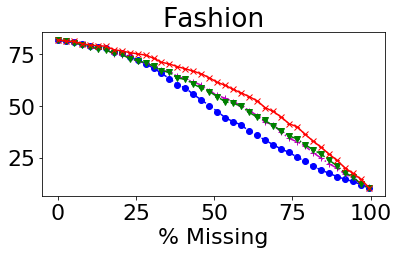

In [12]:
setting2 = {
    "show": ["ours", "min", "mean", "median"],
    "saveAs": "../results/fashion_mnistk_accuracy.pdf",
    "title": "Fashion",
    "Ylabel": "",#"Cross Entropy",
    "Xlabel": "% Missing",
    "legend": False,
    "size": (6,4),
    "mult": 100.0
}
utils.plot_results_paper(data_a3, setting2)

In [13]:
utils.save("../results/data_fashionmnistk_result_cross.pickle", data_a2)
utils.save("../results/data_fashionmnistk_result_accuracy.pickle", data_a3)